In [1]:
# importing libraries.

import my_utils

import html
import time
import functools
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords as sw
import string
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression




In [2]:
# reading the dataset.
# using pandas library


df=pd.read_csv('data.tsv', sep='\t', header=0, error_bad_lines=False)
# tw=pd.read_csv('Twitter Sentiments.csv', sep='\t', header=0, error_bad_lines=False)

C:\Users\HEMANT\AppData\Local\Temp\ipykernel_10720\2781477551.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('data.tsv', sep='\t', header=0, error_bad_lines=False)
b'Skipping line 10437: expected 15 fields, saw 22\nSkipping line 10443: expected 15 fields, saw 22\nSkipping line 19872: expected 15 fields, saw 22\nSkipping line 20055: expected 15 fields, saw 22\nSkipping line 20107: expected 15 fields, saw 22\nSkipping line 20167: expected 15 fields, saw 22\nSkipping line 53858: expected 15 fields, saw 22\n'
b'Skipping line 72173: expected 15 fields, saw 22\nSkipping line 84308: expected 15 fields, saw 22\nSkipping line 92156: expected 15 fields, saw 22\nSkipping line 97791: expected 15 fields, saw 22\nSkipping line 106812: expected 15 fields, saw 22\n'
b'Skipping line 138899: expected 15 fields, saw 22\nSkipping line 145840: expected 15 fields, saw 22\nSkipping line 192385: 

In [5]:
# temp=df.head(3)
# temp

df=df.sample(n=100000)
# df.to_csv(r'C:\Users\Admin\Desktop\file3.csv')
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
1617096,US,34003604,R3D1HJ0Q3B3LSU,B004EYIWBW,991100887,14k Yellow Gold Round Amethyst Lever-back Earr...,Jewelry,4.0,1.0,1.0,N,Y,Petite but well made for the price.,Bought these to go with a pear shaped necklace...,2012-02-09
1426834,US,19456518,R35S7ZP13VRXUJ,B0056333GO,932549394,"925 Sterling Silver Jewelry, America's Ballgam...",Jewelry,5,0.0,0.0,N,N,Softball,My niece is going to love it since she plays b...,2013-02-22
244151,US,9646342,R2XY2D2IYWSX4E,B005DFFWK0,787385880,Formal Aqua Blue Color Faux Pearl Necklace & S...,Jewelry,5,0.0,0.0,N,Y,Five Stars,Great product for a great price. Can't wait to...,2015-05-09
836541,US,13965759,R2SXCNVWN8UJCQ,B00875HRGK,433966748,Amulet Sandal Wood Forever Happy Buddha Lucky ...,Jewelry,3,0.0,0.0,N,N,Good Quaility,Not sure what I was thinking. It is made well ...,2014-08-16
1521308,US,44732781,R2X3W2YQ3MKMMS,B008RL1RQU,331047754,.925 Sterling Silver Pink Crystal Ball Pendant...,Jewelry,5.0,0.0,0.0,N,Y,Pretty!!,Products arrived just on time and very well pa...,2012-12-10


In [6]:
# We require only the review_body, star_rating columns which describes the reviews, star rating of each review respectively.

df=df[['review_body','star_rating']]

In [7]:
#Removing the NULL, missing values and reset the index

df=df.dropna()
df = df.reset_index(drop=True)
df

,review_body,star_rating
0,Bought these to go with a pear shaped necklace...,4.0
1,My niece is going to love it since she plays b...,5
2,Great product for a great price. Can't wait to...,5
3,Not sure what I was thinking. It is made well ...,3
4,Products arrived just on time and very well pa...,5.0
...,...,...
99979,"When it arrived, I immediately wore it to chur...",5.0
99980,Nice ring for the money. I found myself playin...,3
99981,"Small and humble, yet bold enough to make a st...",5
99982,It's a must have its great in every way p.s I'...,5


In [8]:
# tw

In [9]:
#Labelling Reviews: 
#The reviews with star rating 4,5 are labelled as positive reviews and 
#1,2,3 are labelled as negative reviews.

In [10]:
# labelling and adding the new column to the dataset.

df['star_rating']=df['star_rating'].astype(int) #convert the star_rating column to int
df['pos_neg']=np.where(df['star_rating']>=4,'pos','neg') 

In [11]:
#For viewing first 10 rows of the dataset
#using pandas library
df.head(10)

,review_body,star_rating,pos_neg
0,Bought these to go with a pear shaped necklace...,4,pos
1,My niece is going to love it since she plays b...,5,pos
2,Great product for a great price. Can't wait to...,5,pos
3,Not sure what I was thinking. It is made well ...,3,neg
4,Products arrived just on time and very well pa...,5,pos
5,Nice necklace. I like the combination of the i...,5,pos
6,like idea wrong size ring runs small for size ...,4,pos
7,I bought this for my brother. I was skeptical...,5,pos
8,Cool necklace.,5,pos
9,because they are to little may if they put the...,2,neg


In [12]:
# now considering only 2 columns
df=df[['pos_neg','review_body']]
df.head()

,pos_neg,review_body
0,pos,Bought these to go with a pear shaped necklace...
1,pos,My niece is going to love it since she plays b...
2,pos,Great product for a great price. Can't wait to...
3,neg,Not sure what I was thinking. It is made well ...
4,pos,Products arrived just on time and very well pa...


In [13]:
# to get the count of the null values in the columns

df.isnull().sum()

pos_neg        0
review_body    0
dtype: int64

In [14]:
#for dimensions of the the dataset

df.shape

(99984, 2)

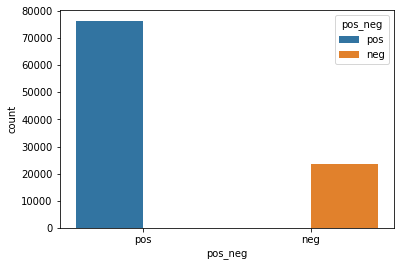

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x= 'pos_neg',data = df, hue='pos_neg')

plt.show()


<AxesSubplot:xlabel='pos_neg', ylabel='count'>

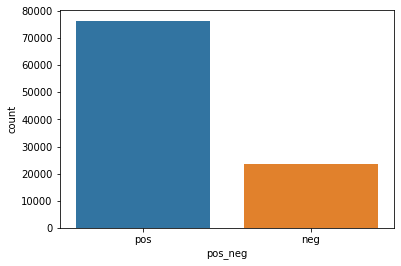

In [64]:
sns.countplot(x= 'pos_neg',data = df)

In [68]:
#getting the count of the pos and neg tags present in the pos_neg column

df.pos_neg.value_counts()

pos    76468
neg    23516
Name: pos_neg, dtype: int64

In [72]:
# Sample positive reveiws to get a balanced dataset
# .loc : Access a group of rows and columns by label(s)
# .sample : The sample() method returns a list with a randomly selection of a specified number of items from a sequnce. 

# If you don't specify the random_state in the code, 
# then every time you run(execute) your code a new random value 
# is generated and the train and test datasets would have different values each time.
neg = df.loc[df.pos_neg=='neg']
pos = df.loc[df.pos_neg=='pos'].sample(n=df.pos_neg.value_counts()['neg'], random_state=42)

In [76]:
len(neg)

23516

In [77]:
len(pos)

23516

In [70]:
# dimensions are changed after doing sampling.

df.shape

(99984, 2)

In [18]:
# define the preprocessing function 

# lemmatization : converts words into their base forms
# using python NLTK library.
lemmatizer = nltk.WordNetLemmatizer() 


# Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”)
# using python NLTK library.
stopwords = sw.words('english')
stopwords = stopwords + ['not_' + w for w in stopwords]

# transform punctuation to blanks
trans_punct = str.maketrans(string.punctuation,' '*len(string.punctuation)) 

# pad punctuation with blanks
pad_punct = str.maketrans({key: " {0} ".format(key) for key in string.punctuation}) 
# remove "_" from string.punctuation
invalidChars = str(string.punctuation.replace("_", ""))  

In [19]:
def preprocessing(line, ngram=1, neg_handling=True, remove_stop=False):
    """
    Preprocessing the review texts
    @parameters:
        line                       - Required: the input text (Str)
        ngram                  - Optional: number n in the n-gram model(Int, 1, 2, or 3)
        neg_handling       - Optional: whether to perform negation handling (Boolean)
        remove_stop        -Optional: whether to remove the stop words (Boolean)
        output             -Preprocessed sentence.
    """
        
    
    line = str(line).replace("can't", "can not")
    line = str(line).replace("n't", " not")
    
    if neg_handling:
        line = str(line).translate(pad_punct)  # If performing negation handling, pad punctuations with blanks
        line = nltk.word_tokenize(line.lower()) # Word normalization and tokenization
        tokens = []
        negated = False
        for t in line:
            if t in ['not', 'no']:
                negated = not negated
            elif t in string.punctuation or not t.isalpha():
                negated = False
            else:
                tokens.append('not_' + t if negated else t)  # add "not_" prefix to words behind "not", or "no"     
    else:
        line = str(line).translate(trans_punct)  # If not performing negation handling, remove punctuations
        line = nltk.word_tokenize(line.lower()) # Word normalization and tokenization
        tokens = line
    
    if ngram==2:
        bi_tokens = list(nltk.bigrams(line))
        bi_tokens = list(map('_'.join, bi_tokens))
        bi_tokens = [i for i in bi_tokens if all(j not in invalidChars for j in i)]
        tokens = tokens + bi_tokens

    if ngram==3:
        bi_tokens = list(nltk.bigrams(line))
        bi_tokens = list(map('_'.join, bi_tokens))
        bi_tokens = [i for i in bi_tokens if all(j not in invalidChars for j in i)]
        tri_tokens = list(nltk.trigrams(line))
        tri_tokens = list(map('_'.join, tri_tokens))
        tri_tokens = [i for i in tri_tokens if all(j not in invalidChars for j in i)]
        tokens = tokens + bi_tokens + tri_tokens    
     
    if remove_stop:
        line = [lemmatizer.lemmatize(t) for t in tokens if t not in stopwords]
    else:
        line = [lemmatizer.lemmatize(t) for t in tokens] 
    
    return ' '.join(line)

In [20]:
# Below are some examples to see the changes when we pass a line for pre-processing.

In [21]:
line1 = "i do not love mexican food"

In [22]:
preprocessing(line1, ngram=1, neg_handling=True, remove_stop=False)

'i do not_love not_mexican not_food'

In [23]:

line = "I don't think this book has any decent information!!! It is full of typos and factual errors that I can't ignore."

preprocessing(line, ngram=1, neg_handling=False, remove_stop=False)

'i do not think this book ha any decent information it is full of typo and factual error that i can not ignore'

In [24]:
preprocessing(line, ngram=1, neg_handling=False, remove_stop=True)


'think book decent information full typo factual error ignore'

In [25]:
preprocessing(line, ngram=1, neg_handling=True, remove_stop=False)

'i do not_think not_this not_book not_has not_any not_decent not_information it is full of typo and factual error that i can not_ignore'

In [26]:
preprocessing(line, ngram=3, neg_handling=True, remove_stop=False)


'i do not_think not_this not_book not_has not_any not_decent not_information it is full of typo and factual error that i can not_ignore i_do do_not not_think think_this this_book book_has has_any any_decent decent_information it_is is_full full_of of_typos typos_and and_factual factual_errors errors_that that_i i_can can_not not_ignore i_do_not do_not_think not_think_this think_this_book this_book_has book_has_any has_any_decent any_decent_information it_is_full is_full_of full_of_typos of_typos_and typos_and_factual and_factual_errors factual_errors_that errors_that_i that_i_can i_can_not can_not_ignore'

In [27]:
#  preprocessing the data
# preprocessing the positive reviews

pos_data = []
n_pos = len(pos)
for i, p in enumerate(pos['review_body']):
    pos_data.append(preprocessing(p, ngram=3))
    my_utils.print_progress(bar_length=50, decimals=0, iteration=i+1, total=n_pos, prefix='Preprocessing pos data: ')


Preprocessing pos data:  |==================================================| 100% 


In [28]:
# preprocessing the negative reviews

neg_data = []
n_neg = len(neg)
for i, n in enumerate(neg['review_body']):
    neg_data.append(preprocessing(n, ngram=3))
    my_utils.print_progress(bar_length=50, decimals=0, iteration=i+1, total=n_neg, prefix='Preprocessing neg data: ')

Preprocessing neg data:  |==================================================| 100% 


In [29]:
# Combine the preprocessed data
data = pos_data + neg_data
labels = np.concatenate((pos['pos_neg'].values, neg['pos_neg'].values))

In [205]:
 # 2.3 Split to training, validation, and test sets
# split the dataset to training, validation, test sets by 60-20-20
train_data, rest_data, train_labels, rest_labels = train_test_split(data, labels, test_size=0.15, 
                                                                    stratify=labels, random_state=1234)
valid_data, test_data, valid_labels, test_labels = train_test_split(rest_data, rest_labels, test_size=0.5, 
                                                                    stratify=rest_labels, random_state=1234)
print("training size = ", len(train_data), "validation size = ", len(valid_data), "testing size = ", len(test_data))

training size =  39977 validation size =  3527 testing size =  3528


In [206]:
train_data

['it is very small probably not_bigger not_than not_a not_dime in certain place the metal look like it is painted the stone wa expected but it s hardly visible but overall it s cute it_is is_very very_small probably_no no_bigger bigger_than than_a a_dime in_certain certain_places places_the the_metal metal_looks looks_like like_it it_is is_painted the_stone was_expected but_it s_hardly hardly_visible but_overall overall_it s_cute it_is_very is_very_small probably_no_bigger no_bigger_than bigger_than_a than_a_dime in_certain_places certain_places_the places_the_metal the_metal_looks metal_looks_like looks_like_it like_it_is it_is_painted s_hardly_visible but_overall_it',
 'my husband work in a coal mine so we needed a ring that wa tough it s more than tough it s beautiful the fit wa perfect i saw one just like this in a department store for my_husband husband_works works_in in_a a_coal coal_mine mine_so so_we we_needed needed_a a_ring ring_that that_was was_tough s_more more_than than_t

In [207]:
# 3. Feature Extraction

# 3.1 Compute the frequency of words

# Push all tokens and compute the frequency of words
tokens = [word for line in train_data for word in nltk.word_tokenize(line)]
word_features = nltk.FreqDist(tokens)

In [208]:
print(word_features)

<FreqDist with 716556 samples and 3658568 outcomes>


In [209]:
# Remove features (words) which occur only once (This is to be used in the basic modeling process)
topwords = [fpair[0] for fpair in list(word_features.most_common(len(word_features))) if fpair[1]>=2] 
len(topwords) 

184178

In [210]:
# 3.2 Vectorizer and Tf-idf term weighting
# Convert a collection of raw documents to a matrix of TF-IDF features.
# Equivalent to CountVectorizer followed by TfidfTransformer.
tf_vec = TfidfVectorizer()

tf_vec.fit_transform([' '.join(topwords)])

<1x184144 sparse matrix of type '<class 'numpy.float64'>'
	with 184144 stored elements in Compressed Sparse Row format>

In [211]:
# 3.3 Feature Extraction

# Extract features from training set
# Vocabulary is from topwords
train_features = tf_vec.transform(train_data)

In [212]:
# Array[n_train_data * n_features]
train_features.shape

(39977, 184144)

In [213]:
# Extract features from test set
test_features = tf_vec.transform(test_data)

In [214]:
test_features.shape

(3528, 184144)

In [215]:
# 4.1 Multinomial Naive Bayes Classification Model (MultinomialNB)
mnb_model = MultinomialNB()
mnb_model

MultinomialNB()

In [216]:
# Train Model
mnb_model.fit(train_features, train_labels)

MultinomialNB()

In [217]:
# Predict
pred = mnb_model.predict(test_features)
print(pred)

['neg' 'pos' 'neg' ... 'neg' 'pos' 'pos']


In [218]:
# Metrics
accuracy = metrics.accuracy_score(test_labels, pred)
print(accuracy)

0.8840702947845805


In [219]:

print(metrics.classification_report(y_true=test_labels, y_pred=pred, digits=4))

              precision    recall  f1-score   support

         neg     0.8625    0.9138    0.8874      1764
         pos     0.9084    0.8543    0.8805      1764

    accuracy                         0.8841      3528
   macro avg     0.8854    0.8841    0.8840      3528
weighted avg     0.8854    0.8841    0.8840      3528



In [220]:
# 4.2 Logistic Regression Mode (Logistic Regression)
lgr_model = LogisticRegression()
print(lgr_model, end='\n'*2)


lgr_model.fit(train_features, train_labels)
lgr_pred = lgr_model.predict(test_features)

print('Accuracy = %.5f' % metrics.accuracy_score(test_labels, lgr_pred))
print(metrics.classification_report(y_pred=lgr_pred, y_true=test_labels, digits=4))

LogisticRegression()

Accuracy = 0.89456
              precision    recall  f1-score   support

         neg     0.8799    0.9138    0.8966      1764
         pos     0.9104    0.8753    0.8925      1764

    accuracy                         0.8946      3528
   macro avg     0.8951    0.8946    0.8945      3528
weighted avg     0.8951    0.8946    0.8945      3528



In [222]:
#SVM

clf = LinearSVC()


clf.fit(train_features, train_labels)
clf_pred= clf.predict(test_features)

print('Accuracy = %.5f' % metrics.accuracy_score(test_labels, clf_pred))
print(metrics.classification_report(y_pred=clf_pred, y_true=test_labels, digits=4))



Accuracy = 0.90249
              precision    recall  f1-score   support

         neg     0.8936    0.9138    0.9036      1764
         pos     0.9118    0.8912    0.9014      1764

    accuracy                         0.9025      3528
   macro avg     0.9027    0.9025    0.9025      3528
weighted avg     0.9027    0.9025    0.9025      3528



In [223]:
def train_with_n_topwords(n, model_name='MultinomialNB', tfidf=True, valid=True, alpha=1.0):
    """
    Training the dataset using selected model and settings
    @params:
        n                       - Required: the number of features used to train the model (Int)
        model_name    - Optional: the model name('MultinomialNB' | 'LogisticRegression' | 'LinearSVC')
        tfidf                  - Optional: whether to perform the tfidf transformation (Boolean)
        valid                 - Optional: whether to use the validation set or the test set (Boolean)
        alpha                - Optional: the penalty parameter in the training model (Float)
    """
            
    if model_name not in ['MultinomialNB', 'LinearSVC', 'LogisticRegression']:
        print("Wrong model name.")
        return
    
    topwords = [fpair[0] for fpair in list(word_features.most_common(n))]
    
    if tfidf:
        vec = TfidfVectorizer()
    else:
        vec = CountVectorizer()
        
    vec.fit_transform([' '.join(topwords)])
    
    # Model
    if model_name == 'MultinomialNB':
        model = MultinomialNB(alpha=alpha)
    elif model_name == 'LinearSVC':
        model = LinearSVC(C=alpha)
    elif model_name == 'LogisticRegression':
        model = LogisticRegression(C=alpha)

    train_X = vec.transform(train_data)
    model.fit(train_X, train_labels)   
    
    if valid: 
        valid_X = vec.transform(valid_data)
        pred = model.predict(valid_X)
        metr = metrics.accuracy_score(valid_labels, pred)
    else:
        test_X = vec.transform(test_data)
        pred = model.predict(test_X)
        metr = metrics.accuracy_score(test_labels, pred)
    
    print("N of topwords:", n, "alpha:", alpha, "accuracy:", metr)
    return metr, vec, model

In [224]:
#MultinomialNB
possible_n = [10000 * i for i in range(1, 11)]

mnb_tfidf_accuracies = []

for i, n in enumerate(possible_n):
    metr = train_with_n_topwords(n, model_name='MultinomialNB')[0]
    mnb_tfidf_accuracies.append([n, metr])

N of topwords: 10000 alpha: 1.0 accuracy: 0.8789339381910972
N of topwords: 20000 alpha: 1.0 accuracy: 0.886305642188829
N of topwords: 30000 alpha: 1.0 accuracy: 0.8851715338814857
N of topwords: 40000 alpha: 1.0 accuracy: 0.8854550609583215
N of topwords: 50000 alpha: 1.0 accuracy: 0.8865891692656649
N of topwords: 60000 alpha: 1.0 accuracy: 0.8854550609583215
N of topwords: 70000 alpha: 1.0 accuracy: 0.8857385880351574
N of topwords: 80000 alpha: 1.0 accuracy: 0.884604479727814
N of topwords: 90000 alpha: 1.0 accuracy: 0.886305642188829
N of topwords: 100000 alpha: 1.0 accuracy: 0.8865891692656649


Text(0.5, 1.0, 'Multinomial Naive Bayes Model')

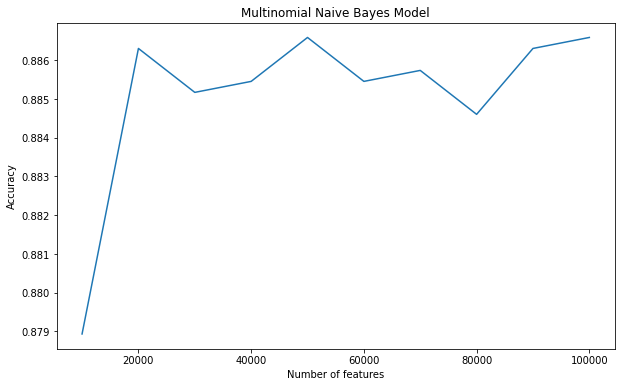

In [225]:
mnb_accu = pd.DataFrame(mnb_tfidf_accuracies, columns=['topwords', 'accuracy'])
fig = plt.figure(figsize=(10,6))
plt.plot(mnb_accu.topwords, mnb_accu.accuracy, label='MultinomialNB')
#plt.legend()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Multinomial Naive Bayes Model")


In [226]:
# Logistic
possible_n = [10000 * i for i in range(1, 11)]

lgr_tfidf_accuracies = []

for i, n in enumerate(possible_n):
    metr = train_with_n_topwords(n, model_name="LogisticRegression")[0]
    lgr_tfidf_accuracies.append([n, metr])

N of topwords: 10000 alpha: 1.0 accuracy: 0.8970796711085909


C:\Users\HEMANT\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


N of topwords: 20000 alpha: 1.0 accuracy: 0.8976467252622625


C:\Users\HEMANT\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


N of topwords: 30000 alpha: 1.0 accuracy: 0.8982137794159343


C:\Users\HEMANT\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


N of topwords: 40000 alpha: 1.0 accuracy: 0.8976467252622625
N of topwords: 50000 alpha: 1.0 accuracy: 0.8970796711085909
N of topwords: 60000 alpha: 1.0 accuracy: 0.8973631981854268
N of topwords: 70000 alpha: 1.0 accuracy: 0.8970796711085909
N of topwords: 80000 alpha: 1.0 accuracy: 0.8970796711085909
N of topwords: 90000 alpha: 1.0 accuracy: 0.8970796711085909


C:\Users\HEMANT\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


N of topwords: 100000 alpha: 1.0 accuracy: 0.8965126169549192


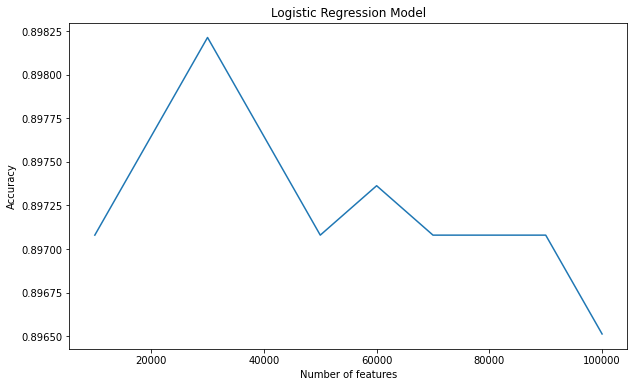

In [227]:
lgr_accu = pd.DataFrame(lgr_tfidf_accuracies, columns=['topwords', 'accuracy'])
fig = plt.figure(figsize=(10,6))
plt.plot(lgr_accu.topwords, lgr_accu.accuracy, label='LogisticRegression')
#plt.legend()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Model")
fig.savefig("model_lgr_large_100k.png")

In [228]:
# SVM
possible_n = [10000 * i for i in range(1, 11)]

svc_tfidf_accuracies = []

for i, n in enumerate(possible_n):
    metr = train_with_n_topwords(n, model_name="LinearSVC")[0]
    svc_tfidf_accuracies.append([n, metr])

N of topwords: 10000 alpha: 1.0 accuracy: 0.8990643606464417
N of topwords: 20000 alpha: 1.0 accuracy: 0.900481996030621
N of topwords: 30000 alpha: 1.0 accuracy: 0.9018996314148001
N of topwords: 40000 alpha: 1.0 accuracy: 0.9027502126453076
N of topwords: 50000 alpha: 1.0 accuracy: 0.9024666855684718
N of topwords: 60000 alpha: 1.0 accuracy: 0.9036007938758152
N of topwords: 70000 alpha: 1.0 accuracy: 0.9033172667989793
N of topwords: 80000 alpha: 1.0 accuracy: 0.9036007938758152
N of topwords: 90000 alpha: 1.0 accuracy: 0.903884320952651
N of topwords: 100000 alpha: 1.0 accuracy: 0.903884320952651


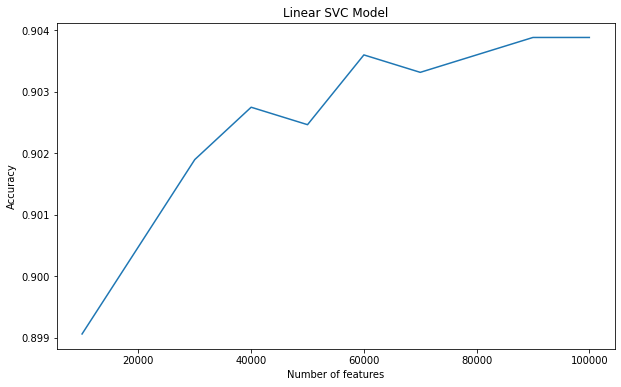

In [229]:
svc_accu = pd.DataFrame(svc_tfidf_accuracies, columns=['topwords', 'accuracy'])
fig = plt.figure(figsize=(10,6))
plt.plot(svc_accu.topwords, svc_accu.accuracy, label='LinearSCV')
#plt.legend()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Linear SVC Model")
fig.savefig("model_svc_large_100k.png")

Text(0.5, 1.0, 'MultinomialNB vs. LinearSVC vs. LogisticRegression models')

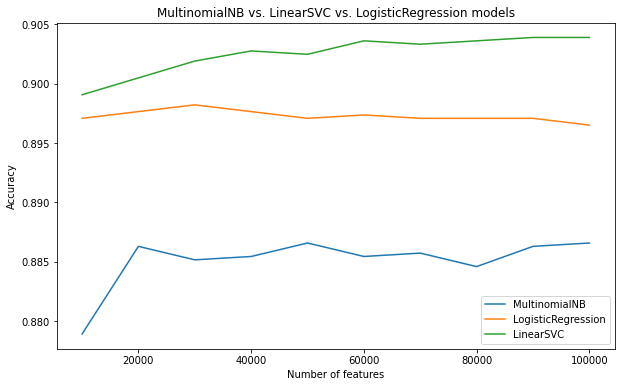

In [231]:
fig = plt.figure(figsize=(10,6))
plt.plot(mnb_accu.topwords, mnb_accu.accuracy, label='MultinomialNB')
plt.plot(lgr_accu.topwords, lgr_accu.accuracy, label='LogisticRegression')
plt.plot(svc_accu.topwords, svc_accu.accuracy, label='LinearSVC')
plt.legend()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("MultinomialNB vs. LinearSVC vs. LogisticRegression models")